# House price prediction

Extracted from this ref. [book](https://www.amazon.com.br/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=asc_df_1492032646/?tag=googleshopp00-20&linkCode=df0&hvadid=379733272930&hvpos=&hvnetw=g&hvrand=5358833530171969532&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1001652&hvtargid=pla-523968811896&psc=1)


Chapter 2 of Hands on Machine Learning With Scikit-Learn and Keras; 

### Download data

In [3]:
import os
import tarfile
import urllib
from matplotlib import pyplot as plt

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
#     os.makedirs(housing_path, exist_ok=True)
#     tgz_path = os.path.join(housing_path, "housing.tgz")
#     urllib.request.urlretrieve(housing_url, tgz_path)
#     housing_tgz = tarfile.open(tgz_path)
#     housing_tgz.extractall(path=housing_path)
#     housing_tgz.close()
    
# fetch_housing_data()    

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

df = load_housing_data()

 - Define goal. 
 
     * create a model that predict median house value

In [5]:
df[:3]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


### EDA ( exploratory data analysis) 

In [6]:
df.shape

(20640, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Lets look at other fields, `describe()` method give a summary for numerical attributes. 

In [11]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

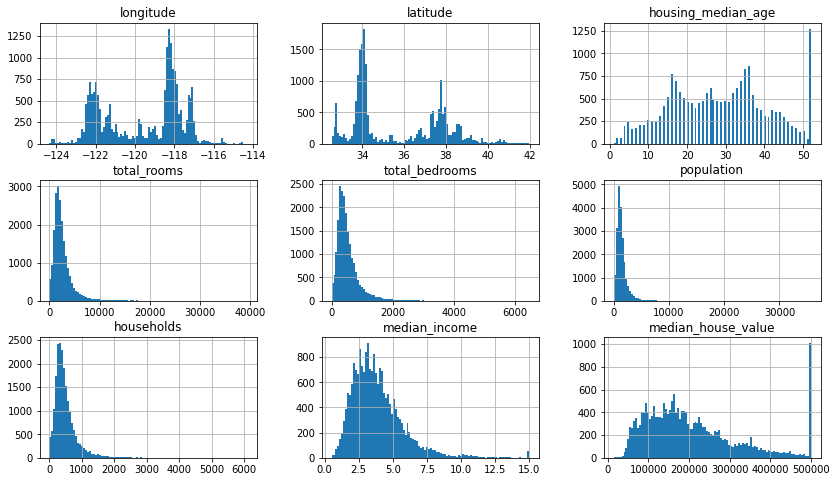

In [12]:
df.hist(figsize=(14,8), bins=100)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

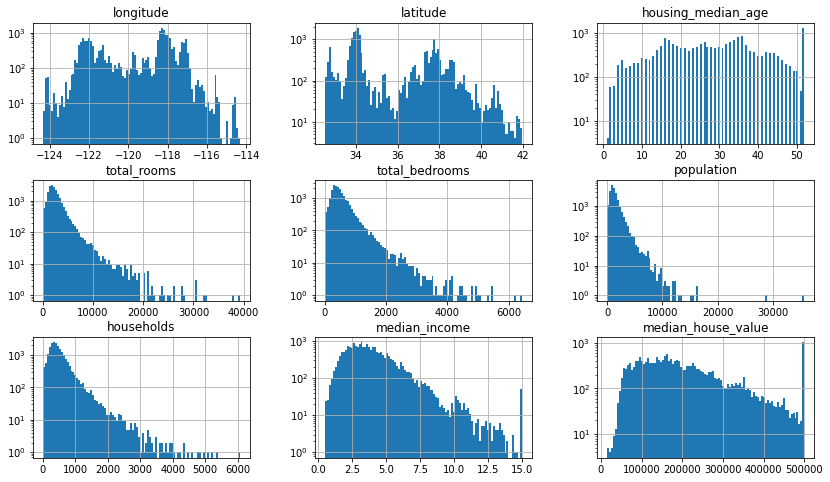

In [13]:
df.hist(figsize=(14,8), bins=100, log=True)

first thing ever in a dataset project is to split in train and test chunks. 

In [96]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.3, random_state=10)

In [97]:
train_set[:2]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17853,-121.88,37.44,23.0,1310.0,267.0,910.0,261.0,5.3994,237900.0,<1H OCEAN
15963,-122.44,37.71,52.0,2711.0,591.0,1848.0,524.0,3.9567,251500.0,NEAR BAY


In [114]:
# train dataset
train_set_attr = train_set.drop('median_house_value', axis=1)
y_train = train_set['median_house_value']

# test dataset
test_set_attr = test_set.drop('median_house_value', axis=1)
y_test = test_set['median_house_value']


assert y_train.isnull().sum() == 0
assert y_test.isnull().sum() == 0

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]

num_attribs = list(train_set_attr.drop('ocean_proximity', axis=1))
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_train = full_pipeline.fit_transform(train_set_attr)

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

tree = DecisionTreeRegressor()
rfr = RandomForestRegressor()

In [109]:
tree.fit(X_train, y_train)
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [112]:
X_test = full_pipeline.transform(test_set_attr)

In [115]:
from sklearn.metrics import mean_squared_error 

y_pred_tree = tree.predict(X_test)
y_pred_rfr = rfr.predict(X_test)

rms_tree = mean_squared_error(y_true=y_test,y_pred=y_pred_tree, squared=False)
rms_rfr = mean_squared_error(y_true=y_test,y_pred=y_pred_rfr, squared=False)
rms_tree, rms_rfr

(68353.99475433373, 50240.61207561364)

In [128]:
y_tree_pred_train = tree.predict(X_train)
y_rfr_pred_train = rfr.predict(X_train)

mean_squared_error(y_true=y_train,y_pred=y_tree_pred_train, squared=False),  mean_squared_error(y_true=y_train,y_pred=y_rfr_pred_train, squared=False) 


(0.0, 18569.155908720368)

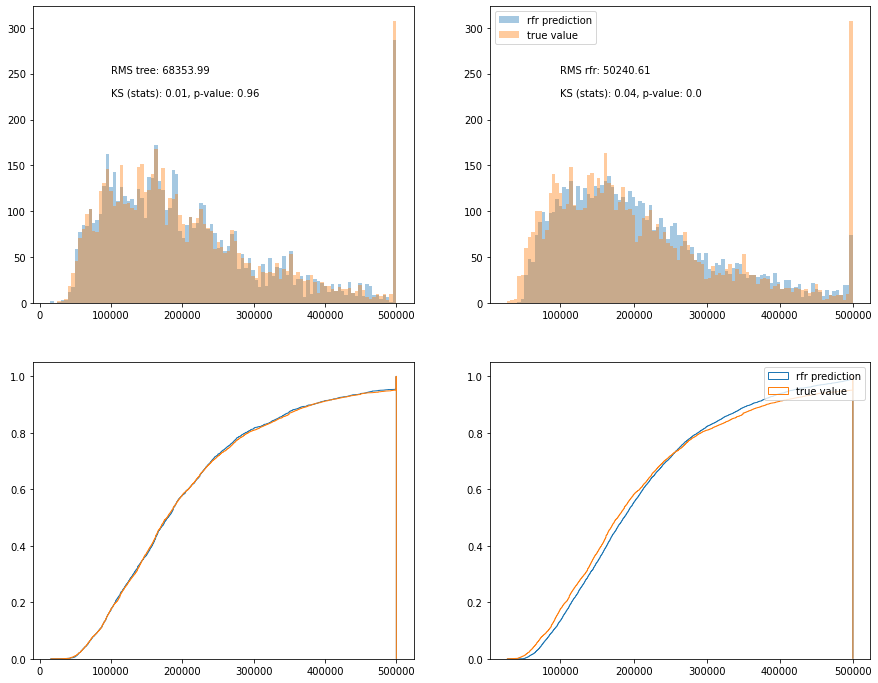

In [145]:
from scipy import stats

fig, axes = plt.subplots(2,2, figsize=(15,12))

# perform KS test for goodness of fit
ks_tree, pvalue_tree= stats.ks_2samp(y_test, y_pred_tree)[0], stats.ks_2samp(y_test, y_pred_tree)[1]
ks_rfr, pvalue_rfr= stats.ks_2samp(y_test, y_pred_rfr)[0], stats.ks_2samp(y_test, y_pred_rfr)[1]


# defining min and max range of the histogram to align the bining scheme,
min_tree, max_tree = min([y_test.min(), y_pred_tree.min()]), max([y_test.max(), y_pred_tree.max()])
min_rfr, max_rfr = min([y_test.min(), y_pred_rfr.min()]), max([y_test.max(), y_pred_rfr.max()])

axes[0][0].hist(y_pred_tree, bins=100, range=(min_tree, max_tree), label='tree prediction', alpha=0.4)
axes[0][0].hist(y_test, bins=100, range=(min_tree, max_tree), label='true value', alpha=0.4)

axes[0][1].hist(y_pred_rfr, bins=100, range=(min_rfr, max_rfr), label='rfr prediction', alpha=0.4)
axes[0][1].hist(y_test, bins=100, range=(min_rfr, max_rfr), label='true value', alpha=0.4)

axes[0][1].legend()

axes[0][0].text(1e5, 250, f"RMS tree: {round(rms_tree,2)}" )
axes[0][0].text(1e5, 225, f"KS (stats): {round(ks_tree,2)}, p-value: {round(pvalue_tree,2)}" )
axes[0][1].text(1e5, 250, f"RMS rfr: {round(rms_rfr,2)}" )
axes[0][1].text(1e5, 225, f"KS (stats): {round(ks_rfr,2)}, p-value: {round(pvalue_rfr,2)}" )
axes[0][1].legend()

axes[1][0].hist(y_pred_tree, bins=1000, range=(min_tree, max_tree), label='tree prediction', alpha=1, density=True, cumulative=True, histtype='step')
axes[1][0].hist(y_test, bins=1000, range=(min_tree, max_tree), label='true value', alpha=1, density=True, cumulative=True, histtype='step')

axes[1][1].hist(y_pred_rfr, bins=1000, range=(min_rfr, max_rfr), label='rfr prediction', alpha=1, density=True, cumulative=True, histtype='step')
axes[1][1].hist(y_test, bins=1000, range=(min_rfr, max_rfr), label='true value', alpha=1, density=True, cumulative=True,  histtype='step')

axes[1][1].legend()

# axes[1][0].text(1e5, 250, f"RMS tree: {round(rms_tree,2)}" )
# axes[1][0].text(1e5, 225, f"KS (stats): {round(ks_tree,2)}, p-value: {round(pvalue_tree,2)}" )
# axes[1][1].text(1e5, 250, f"RMS rfr: {round(rms_rfr,2)}" )
# axes[1][1].text(1e5, 225, f"KS (stats): {round(ks_rfr,2)}, p-value: {round(pvalue_rfr,2)}" )
axes[1][1].legend()